<a target="_blank" href="https://colab.research.google.com/github/Sebelino/DD2424-project/blob/main/e1_sebastian.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [13]:
%load_ext autoreload
%autoreload 2

import os
import socket

repo_name = "DD2424-project"
dep_filename = "download_dataset.py"
cwd = os.getcwd()
hostname = socket.gethostname()

print(f"Host: {hostname}")
print(f"You are here: {cwd}")

if os.path.exists(dep_filename):
    print(f"{dep_filename} is in your current directory. Assuming you are in the root of the repository.")
elif not os.path.exists(repo_name):
    print(f"Cloning repo and fetching {dep_filename}...")
    !git clone https://github.com/Sebelino/DD2424-project
    !cp DD2424-project/download_dataset.py .
else:
    !git -C DD2424-project pull --rebase
    !cp DD2424-project/download_dataset.py .

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Host: deeplearning-vm
You are here: /home/sebelino/pycharm_deployment
download_dataset.py is in your current directory. Assuming you are in the root of the repository.


In [14]:
from determinism import Determinism

determinism = Determinism(seed=42).sow()  # Keep this before any torch import
print("Training results should now be reproducible.")


Training results should now be reproducible.


# Train model

Training with params:
{
  "seed": 42,
  "architecture": "resnet50",
  "optimizer": {
    "learning_rate": 0.022630885203465553,
    "weight_decay": 8.478660307897792e-05,
    "momentum": 0.8063799868511693,
    "name": "nag"
  },
  "n_epochs": 10,
  "freeze_layers": true,
  "unfreezing_epochs": [2, 4],
  "validation_freq": 1
}
Training result:
{
  "training_losses": [1.4778339610151623, 0.2932466019106948, 0.09294865090076042, 0.04978279917217467, 0.03007580233110196, 0.019689448112014517, 0.014438971923917288, 0.009206086052986591, 0.007954781970550792, 0.005977974824655457],
  "training_accuracies": [0.7438858695652174, 0.9235733695652174, 0.9762228260869565, 0.9870923913043478, 0.9932065217391305, 0.9952445652173914, 0.9976222826086957, 0.9979619565217391, 0.9979619565217391, 0.9989809782608695],
  "validation_accuracies": [0.8940217391304348, 0.9103260869565217, 0.9415760869565217, 0.9334239130434783, 0.9456521739130435, 0.9442934782608695, 0.9442934782608695, 0.9429347826086957, 0

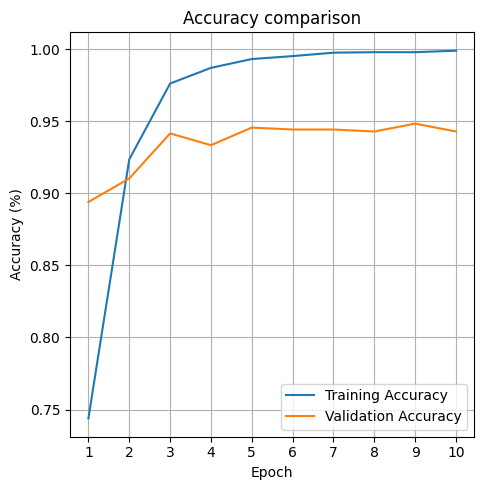

In [17]:
%reload_ext autoreload
%autoreload 2

from training import TrainParams, NagParams
from evaluation import evaluate_test_accuracy_and_misclassified, \
    evaluate_with_train_val_plot, run_with_different_seeds, run_comparison
from run import run
from caching import invalidate_cache_entry
from datasets import DatasetParams

dataset_params = DatasetParams(
    splitting_seed=determinism.seed,
    shuffler_seed=determinism.seed,
    batch_size=32,
    trainval_size=None,  # Load all training data
    #trainval_size=400,  # Load a subset
    validation_set_fraction=0.2,  # 20 % of trainval set
)

baseline_params = TrainParams(
    seed=determinism.seed,
    architecture="resnet50",
    n_epochs=10,
    optimizer=NagParams(
        learning_rate=0.022630885203465553,
        weight_decay=8.478660307897792e-05,
        momentum=0.8063799868511693,
    ),
    freeze_layers=True,
    unfreezing_epochs=(2, 4),
    validation_freq=1,
    time_limit_seconds=None,
    val_acc_target=None,
)

run_args = (dataset_params, baseline_params)

# Set invalidate=True to invalidate a single cache entry
invalidate_cache_entry(run, run_args, invalidate=False)

# First plot: Training and validation accuracy
print("Training with params:")
print(baseline_params.pprint())
result = run(*run_args)

print("Training result:")
print(result.pprint())
evaluate_with_train_val_plot(result)

Update step:   0%|          | 0/920 [00:00<?, ?it/s]

Epoch [1/10], Loss: 1.4714, Train Acc: 74.49%, Val Acc: 88.59%
Epoch [2/10], Loss: 0.2911, Train Acc: 92.66%, Val Acc: 91.58%
Epoch [3/10], Loss: 0.0946, Train Acc: 97.49%, Val Acc: 94.02%
Epoch [4/10], Loss: 0.0480, Train Acc: 98.85%, Val Acc: 92.93%
Epoch [5/10], Loss: 0.0315, Train Acc: 99.25%, Val Acc: 94.16%
Epoch [6/10], Loss: 0.0194, Train Acc: 99.56%, Val Acc: 93.75%
Epoch [7/10], Loss: 0.0142, Train Acc: 99.66%, Val Acc: 94.16%
Epoch [8/10], Loss: 0.0096, Train Acc: 99.93%, Val Acc: 93.48%
Epoch [9/10], Loss: 0.0075, Train Acc: 99.86%, Val Acc: 94.97%
Epoch [10/10], Loss: 0.0086, Train Acc: 99.90%, Val Acc: 93.48%
Total elapsed: 126.55s, average per update step: 0.10s


Update step:   0%|          | 0/920 [00:00<?, ?it/s]

Epoch [1/10], Loss: 1.4778, Train Acc: 74.22%, Val Acc: 89.40%
Epoch [2/10], Loss: 0.2919, Train Acc: 92.32%, Val Acc: 91.44%
Epoch [3/10], Loss: 0.0933, Train Acc: 97.35%, Val Acc: 94.16%
Epoch [4/10], Loss: 0.0490, Train Acc: 98.88%, Val Acc: 93.07%
Epoch [5/10], Loss: 0.0289, Train Acc: 99.32%, Val Acc: 93.89%
Epoch [6/10], Loss: 0.0170, Train Acc: 99.73%, Val Acc: 94.70%
Epoch [7/10], Loss: 0.0106, Train Acc: 99.93%, Val Acc: 94.29%
Epoch [8/10], Loss: 0.0093, Train Acc: 99.80%, Val Acc: 94.02%
Epoch [9/10], Loss: 0.0094, Train Acc: 99.76%, Val Acc: 95.11%
Epoch [10/10], Loss: 0.0089, Train Acc: 99.86%, Val Acc: 94.29%
Total elapsed: 127.23s, average per update step: 0.10s


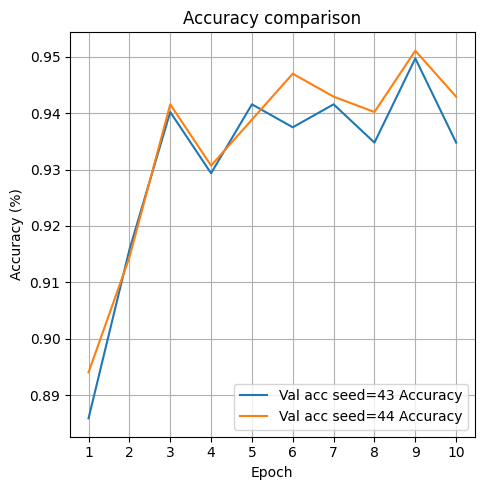

In [19]:
# Second plot: Rerun training multiple times with different seed
run_with_different_seeds(dataset_params, baseline_params, trials=2)

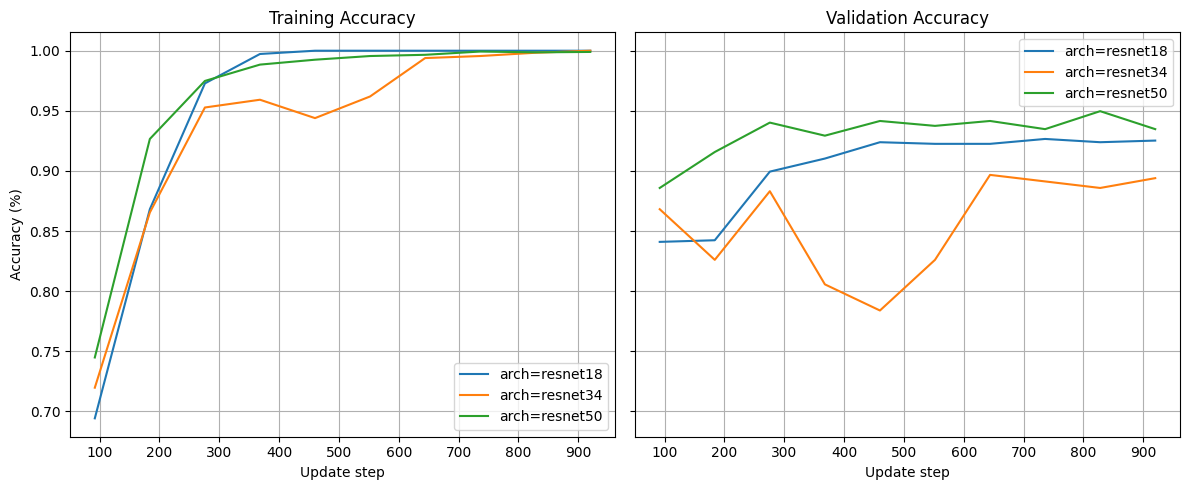

In [32]:

def tweak(params: TrainParams, architecture):
    params = params.copy()
    params.architecture = architecture
    return params


# Third plot: Compare learning rates
architectures = [
    "resnet18",
    "resnet34",
    "resnet50",
]
param_sets = {f"arch={arch}": tweak(baseline_params, architecture=arch) for arch in architectures}

run_comparison(dataset_params, param_sets)


# Test model

Training with params:
{
  "seed": 42,
  "architecture": "resnet50",
  "optimizer": {
    "learning_rate": 0.022630885203465553,
    "weight_decay": 8.478660307897792e-05,
    "momentum": 0.8063799868511693,
    "name": "nag"
  },
  "n_epochs": 8,
  "freeze_layers": true,
  "unfreezing_epochs": [2, 4],
  "validation_freq": 1
}


Update step:   0%|          | 0/80 [00:00<?, ?it/s]

Epoch [1/8], Loss: 2.2457, Train Acc: 55.31%, Val Acc: 96.25%
Epoch [2/8], Loss: 0.4631, Train Acc: 94.69%, Val Acc: 98.75%
Epoch [3/8], Loss: 0.1391, Train Acc: 98.12%, Val Acc: 100.00%
Epoch [4/8], Loss: 0.0551, Train Acc: 99.69%, Val Acc: 98.75%
Epoch [5/8], Loss: 0.0387, Train Acc: 99.69%, Val Acc: 100.00%
Epoch [6/8], Loss: 0.0261, Train Acc: 99.69%, Val Acc: 98.75%
Epoch [7/8], Loss: 0.0155, Train Acc: 99.69%, Val Acc: 98.75%
Epoch [8/8], Loss: 0.0118, Train Acc: 99.69%, Val Acc: 98.75%
Elapsed for all epochs: 15.16s, average per epoch: 1.04s, average per batch: 0.13s
Test size: 3669


Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Final Test Accuracy: 20.39%
Number of misclassified samples: 2921


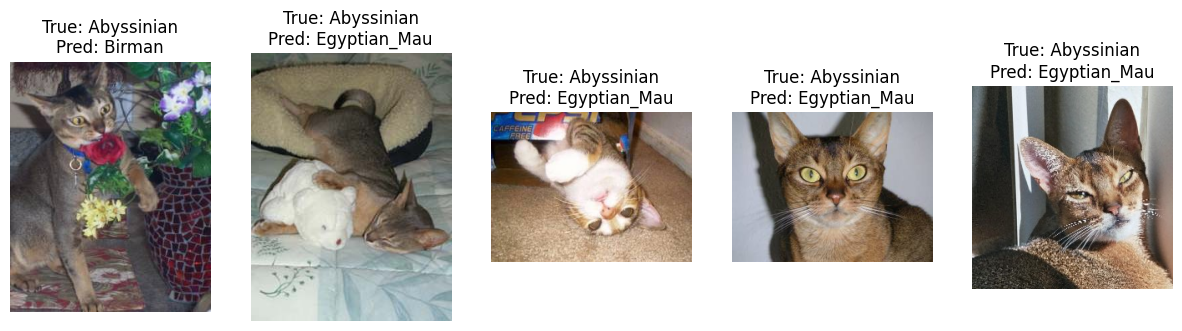

Copied 2921 misclassified images to ./misclassified


In [21]:

from training import FinishedAllEpochs

training_params = baseline_params

print("Training with params:")
print(training_params.pprint())
trainer = Trainer(training_params)
labelled_train_loader, unlabelled_train_loader, val_loader = make_datasets(dataset_params, trainer.transform)
trainer.load(labelled_train_loader, unlabelled_train_loader, val_loader)
trainer.train(stop_condition=FinishedAllEpochs())

test_dataset = load_dataset("test", Trainer.make_transform(training_params))
test_loader = DataLoader(
    test_dataset,
    batch_size=dataset_params.batch_size,
    shuffle=False,
    num_workers=3,
    worker_init_fn=Determinism.data_loader_worker_init_fn(training_params.seed),
)
print(f"Test size: {len(test_loader.dataset)}")

evaluate_test_accuracy_and_misclassified(trainer, test_loader, test_dataset)
